In [75]:
import pandas as pd
amazon = pd.read_csv('amazon-orders.csv')

In [76]:
amazon.head(5)

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,NaN
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,NaN
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,NaN
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,NaN,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,NaN
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,NaN


* To get a readout of the full size of our data set, we use df.shape. This gives us the dimensions of our DataFrame. It reveals that our DataFrame has 59 rows and 23 columns.

In [77]:
amazon.shape

(59, 23)

In [78]:
amazon = amazon.fillna(0)

In [79]:
amazon.head(2)
print(type('Total Charged'))

<class 'str'>


In [80]:
amazon['Total Charged'] = amazon['Total Charged'].str.replace('$', '').astype(float)

In [81]:
amazon.head(3)

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,9.99,Your Name,0.0


# Calculating the Total Amount of Money Spent on Amazon
Pandas includes some basic math functions that we can use on this column. Let’s start with .sum(), which will give us the total of every number in this column — in other words, the total we’ve spent on Amazon.

In [82]:
total_spent = amazon['Total Charged'].sum()
total_spent

1777.7300000000002

The total money spent on Amazon is 1,777.73. Next we calculate average spent, highest purchase etc.

# Average Spend on Amazon, Biggest Purchase, Etc.

In [83]:
average_spent = amazon['Total Charged'].mean()
average_spent

30.131016949152542

This shows that I spent $30.13 on average for every purchase on Amazon during the time period. Since looking at the mean/average can sometimes hide outliers, it’s nice to check out the median as well. I used .median() to do that.

In [84]:
median_spent = amazon['Total Charged'].median()
median_spent

15.95

Which shows my median spend is quite a bit lower than my average spend. Looks like I made few expensive orders. Let’s see what the highest-priced order was by using max():

In [85]:
maximum_spent = amazon['Total Charged'].max()
maximum_spent

210.99

In [86]:
minimum_spent = amazon['Total Charged'].min()
minimum_spent

1.04

My priciest order was 211 and my lowest-priced order was 1.04 using .min()

# How Much Have I Paid in Sales Tax?

In [87]:
amazon['Tax Charged'] = amazon['Tax Charged'].str.replace('$', '').astype(float)

In [88]:
amazon.head(5)

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,1.93,36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,0.00,16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,0.00,9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,8.14,156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,0.00,14.99,Your Name,0.0


In [89]:
total_taxed = amazon['Tax Charged'].sum()
total_taxed

52.60999999999999

I paid tax of about $52.61 total in total. To find the tax rate, I divide the total tax paid by total sum of purchse  

In [90]:
total_taxed/total_spent

0.02959392033660904

During this time period, I paid an overall effective sales tax rate of about 2.9%.

# Analyzing Amazon Spending Over Time

In [91]:
amazon['Order Date'] = pd.to_datetime(amazon['Order Date'])

In [92]:
amazon.head(3)

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,2019-04-01,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,1.93,36.93,Your Name,0.0
1,2019-04-01,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,0.00,16.99,Your Name,0.0
2,2019-04-01,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,0.00,9.99,Your Name,0.0


 From the three rows, we can see that the date formatting has changed from 2019/04/01 to 2019-04-01. That’s a good sign that our change to datetime has worked, and we can proceed to the next step of our analysis.

One thing that might be interesting to look at is how much was spent on each particular day in this data set. That’s an analysis that would be easiest to look at visually, perhaps in the form of a bar graph.

In [99]:
%matplotlib inline

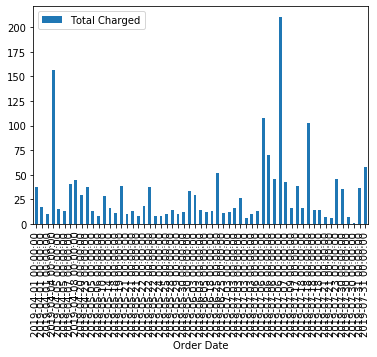

In [94]:
amazon.plot.bar(x='Order Date', y='Total Charged', rot=90)

That chart is a little small, and it’s hard to see whether we’ve really gotten what we want. We will enlarge it so that we can read the data more easily.

We can do that by adding an argument to our plotting code called figsize. This allows us to define the size of the graph (fig is short for figure) by width and height. The units it uses aren’t particularly intuitive, but (20, 10) is a good default to start from for most charts, and then we can adjust further if needed.

All we need to do is add figsize=(20,10) to the arguments we already have in our code. Note that each separate argument is separated with a comma.

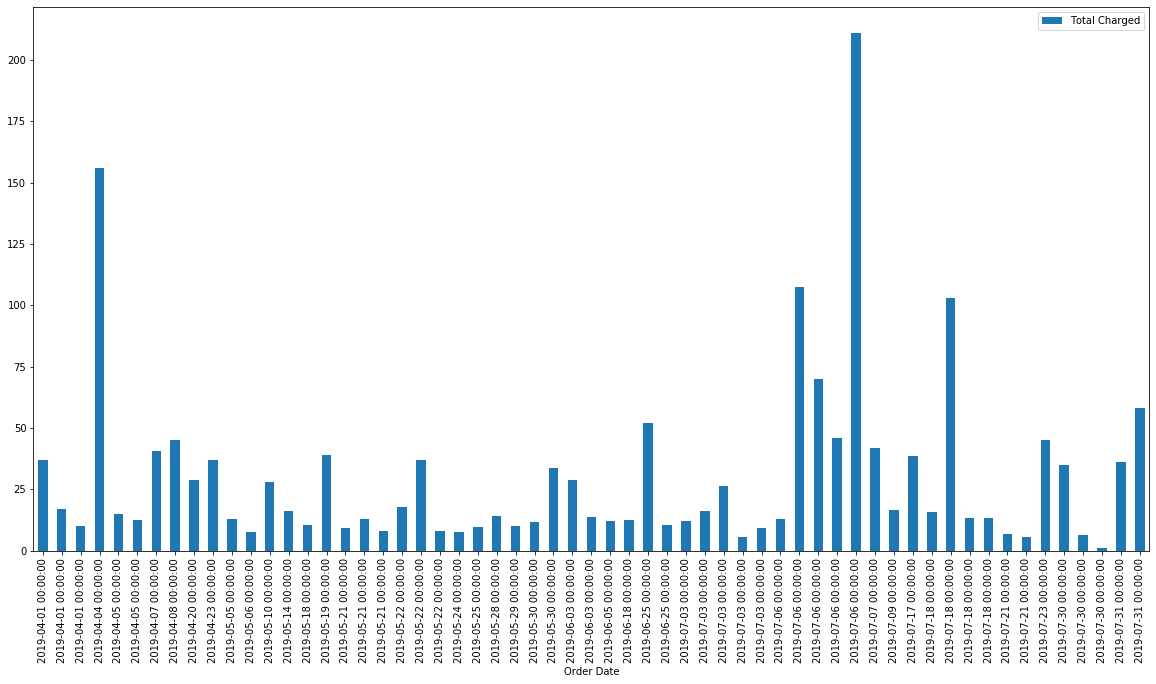

In [98]:
amazon.plot.bar(x='Order Date', y='Total Charged', rot=90, figsize=(20, 10))

With multiple orders placed on the same day, each order is getting a separate bar in the bar chart. This is a problem we have to solve. For example, at the first three bars on the chart — all three of them are for April 1, representing three separate orders placed that day.

That’s not really what we were trying to visualize. We want to see how much was spent each day. Each bar should represent a day, not a single order, so if there was more than one order on that day, the totals charged for those orders should be added together. This can be achieved using another built-in pandas function: df.groupby().

The syntax for this is a little bit complex, but we can break what we want to do down into two parts: 1. We want to group our data by 'Order Date', so that all the orders that share the same date are counted in a single row (i.e., we want one row for April 1, rather than three). 2. We want to get the sum of the prices paid in 'Total Charged' column for each date and make it the value for 'Total Charged' in the relevant date’s row (i.e., we want the value of 'Total Charged' in the April 1 row to be the sum total of the three orders placed that day).

In [96]:
daily_order = amazon.groupby('Order Date').sum()['Total Charged']
daily_order.head()

Order Date
2019-04-01     63.91
2019-04-04    156.12
2019-04-05     27.64
2019-04-07     40.63
2019-04-08     44.99
Name: Total Charged, dtype: float64

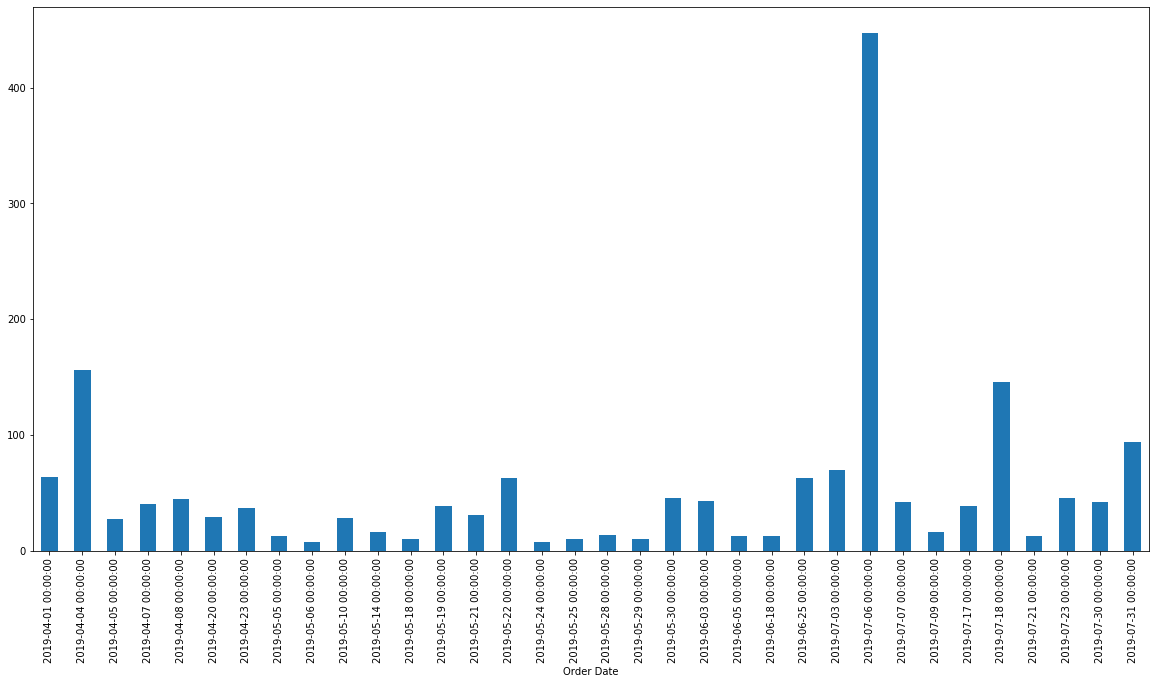

In [97]:
daily_order.plot.bar(figsize=(20, 10))

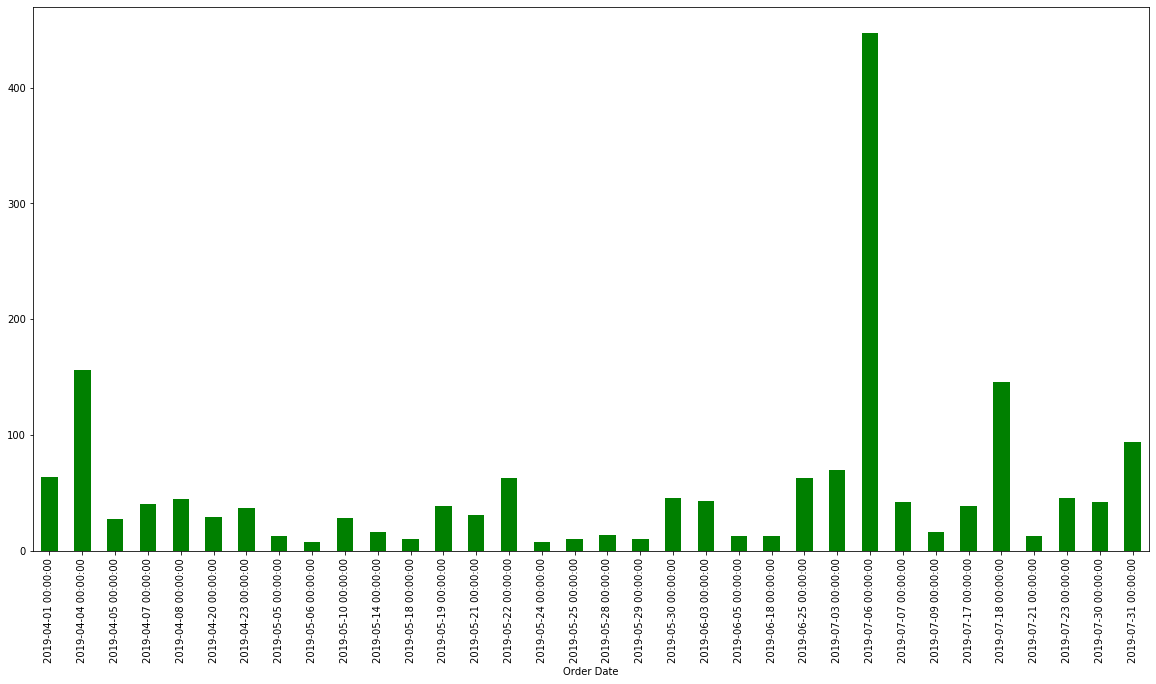

In [100]:
daily_order.plot.bar(figsize=(20, 10), color='green')